## Tidy Data Project

## Step 1: Loading in dependencies and data
To start, I made sure that pandas and matplotlib where imported, as they are essential for the tidying and analysis of the data.
I also brought in the data using the pandas .readcsv function. This saves us from having to manually type the dataset in.
Then for good measure, I used the .head function to take alook at the data. We can see that it's definitely not tidy, and get an idea of what changes need to be made.

In [81]:
# Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("olympics_08_medalists.csv") # Connecting data csv file to code
print(df.head())
# We can see data is currently in messy state. 
# Though the athletes correctly represent the observations, making up the rows, the other aspects of the data are jumbled.
# The values for type of sport are treated as the attributes, making up the columns. 
# Also, the medal type is treated as the values, rather than their own attribute.

       medalist_name male_archery female_archery male_athletics  \
0    Aaron Armstrong          NaN            NaN           gold   
1      Aaron Peirsol          NaN            NaN            NaN   
2   Abdullo Tangriev          NaN            NaN            NaN   
3  Abeer Abdelrahman          NaN            NaN            NaN   
4            Abhinav          NaN            NaN            NaN   

  female_athletics male_badminton female_badminton male_baseball  \
0              NaN            NaN              NaN           NaN   
1              NaN            NaN              NaN           NaN   
2              NaN            NaN              NaN           NaN   
3              NaN            NaN              NaN           NaN   
4              NaN            NaN              NaN           NaN   

  male_basketball female_basketball  ... female_beach volleyball  \
0             NaN               NaN  ...                     NaN   
1             NaN               NaN  ...            

# Step 2: Changing Data From Wide to Long (AKA Tidying!)
To begin the tidying process, I set up the columns, also know as the attributes. Fortunately, the observations (aka rows aka index) were already correct, with the medalists' names making up each row. The atributes were all messed up though. The original dataset had each indivdual sport as it's own attribute, which does a couple things. Firstly, it makes the dataset really long and unwieldy since there are many different sports. Second, it makes the medal type then become the values, when it too should be it's own attribute. To fix these errors, I used id_vars, var_name, and value_name to rearrange the columns. 

The next thing I wanted to do was separate the sport attribute into two attributes: sport and gender. I noticed that each sport was listed in the format Gender_Sport, so there was any easy spot to split the string where the underscore was. Then, using the expand function, you can make it into two columns. Last thing is to get rid of the old combined attribute using .drop.

In [82]:
df_melted = df.melt(id_vars = ["medalist_name"], 
                    var_name = "Gender_Sport", 
                    value_name = "Medal")
# This creates three columns for the attributes. Rather than each sport being it's own attribute, we have one attribute for sports.
# Medal also gets its own column since it is an attribute as well. 
# It no longer serves as the values for all the different sports as their own attributes.

df_melted[["Gender", "Sport"]] = df_melted["Gender_Sport"].str.split("_", expand=True)
# Here I made gender and sport two separate attributes.
# I used the function str.split to split up what was originally just one attribute: gender_sport.
# I split them on the underscore which was consistent across all the values
# Finally I used expand=True to split the attribute into two separate columns.

df_melted = df_melted.drop(columns = ["Gender_Sport"])
# Drop the "Gender_Sport" column using .drop function. This column is no longer needed since the attribute has been split into two.

df_melted = df_melted[(df_melted["Medal"] == "gold") | (df_melted["Medal"] == "silver") | (df_melted["Medal"] == "bronze")]
# Last thing to fix is the medal values.
# Used booleans to check if the values in the medal column matches any of the types.

df_melted.columns = df_melted.columns.str.replace("medalist_name", "Medalist Name")
# Use string replacement to get the column "medalist_name" to match the capitalized format of the other columns.

print(df_melted.head())
# .head function to take a look at what the data looks like now. It's tidy!

      Medalist Name   Medal Gender    Sport
177    Bair Badënov  bronze   male  archery
676   Ilario Di Buò  silver   male  archery
682    Im Dong-hyun    gold   male  archery
760       Jiang Lin  bronze   male  archery
920  Lee Chang-hwan    gold   male  archery


## Step 3: Visualizations and Agregations
For my visualizations using this data, I thought it would be interesting to compare the medals won across gender. I was curious to see if the numbers would be the same, indicating that all sports had categories for both men and women, or if some sports were only for one gender. Using matplotlib, I set up plots using the grouby function to choose which variables to look at. I found that there were more medals won by men than women. Following this, I created another visualization to compare the participation of men and women across sports. Supporting the findings of the first visualization, the second visualization grouped by sport and gender showed that there were indeed big differences in some sports between then number of men and women competing in them. The matplotlib visualizations are a great and important way to quickly visualize trends like these that are impossible to see in a datatable.

For pivot tables and aggregations, you can reorganize your data by ydifferent variables to examine different trends. Unlike visualizations, this is all numerical and in a table, but it can still be really useful. Tidy data does not always mean it is in the most readible format. In certain situations, you may want to focus in on different variables or attributes in comparison to one another. For this project, I wanted to look at the number of medals won in each sport. The second visualization I did gave a peek at this, but since it was a bar graph and separated between men and women, it makes it harder to see the exact differences. Using a pivot table with and assigned index and columns, you can see the exact numbers in order to more accurately make comparisons. The second pivot table I made also looked at a count, this time comparing between men and women. This pivot table shows the same thing as my second visualization, but does it in the form of a table with exact numbers. This is useful for making more exact comparisons, rather than just viewing trends at a glance.

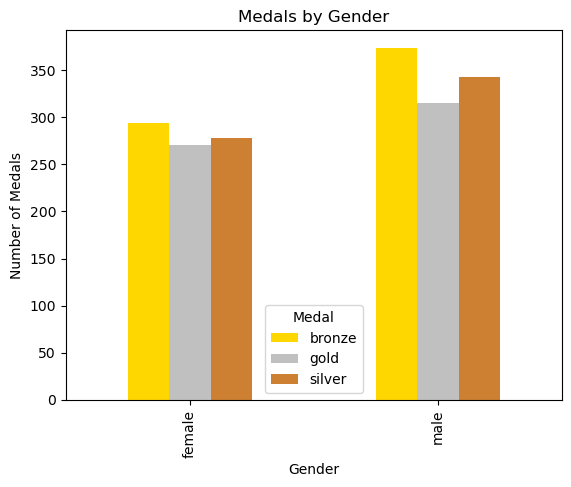

In [83]:
medals_by_gender = df_melted.groupby(["Gender", "Medal"]).size().unstack() # Setting up which attributes used in visualization
medals_by_gender.plot(kind = "bar", color = ["#FFD700", "#C0C0C0", "#CD7F32"]) # Assigning plot type and colors for the medals
plt.title("Medals by Gender") # Assigning title to graph
plt.xlabel("Gender") # Labelling axis
plt.ylabel("Number of Medals")
plt.show() #Showing the visualization

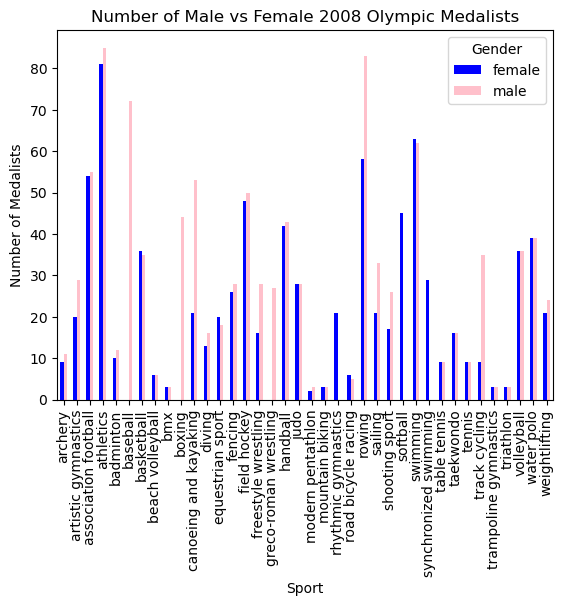

In [84]:
sports_by_gender = df_melted.groupby(["Sport", "Gender"]).size().unstack() # Same process, except using different attributes
sports_by_gender.plot(kind = "bar", color = ["blue", "pink"]) # Assigning colors
plt.title("Number of Male vs Female 2008 Olympic Medalists") # Title
plt.xlabel("Sport") # Labeling axis
plt.ylabel("Number of Medalists")
plt.xticks(rotation = 90)  # Turning x-axis labels of the sports so they don't overlap
plt.show() # Showing graph

In [85]:
# For an aggregation, I used matplotlib to organize the number of each type of medals won by the sport they were won in.
# I organized the data with sport as the rows or index and medal as the columns. 
medal_types_count = df_melted.pivot_table(index = "Sport", 
                                          columns = "Medal", 
                                          values = "Medalist Name", 
                                          aggfunc = "count")

# Displaying data
print("Number of Gold, Silver, and Bronze Medals won in each sport:")
print(medal_types_count)


Number of Gold, Silver, and Bronze Medals won in each sport:
Medal                  bronze  gold  silver
Sport                                      
archery                     8     5       7
artistic gymnastics        19    14      16
association football       36    37      36
athletics                  55    52      59
badminton                   7     7       8
baseball                   24    24      24
basketball                 24    23      24
beach volleyball            4     4       4
bmx                         2     2       2
boxing                     22    11      11
canoeing and kayaking      27    24      23
diving                     11     7      11
equestrian sport           14    11      13
fencing                    15    18      21
field hockey               33    33      32
freestyle wrestling        22    11      11
greco-roman wrestling      13     7       7
handball                   28    29      28
judo                       28    14      14
modern pentathl

In [86]:
# Now I tried a different aggregation, looking at the number of medals won by gender.
medal_count_by_gender = df_melted.pivot_table(index = "Sport",
                                              columns = "Gender",
                                              values = "Medal",
                                              aggfunc = "count",
                                              fill_value = 0)
# Here I made the observation the sport and the attributes the gender. The values are the count for how many medals were won.

# Displaying data
print("Medals Won by Gender:")
print(medal_count_by_gender)


Medals Won by Gender:
Gender                 female  male
Sport                              
archery                     9    11
artistic gymnastics        20    29
association football       54    55
athletics                  81    85
badminton                  10    12
baseball                    0    72
basketball                 36    35
beach volleyball            6     6
bmx                         3     3
boxing                      0    44
canoeing and kayaking      21    53
diving                     13    16
equestrian sport           20    18
fencing                    26    28
field hockey               48    50
freestyle wrestling        16    28
greco-roman wrestling       0    27
handball                   42    43
judo                       28    28
modern pentathlon           2     3
mountain biking             3     3
rhythmic gymnastics        21     0
road bicycle racing         6     5
rowing                     58    83
sailing                    21    33
shooti